<IPython.core.display.Javascript object>


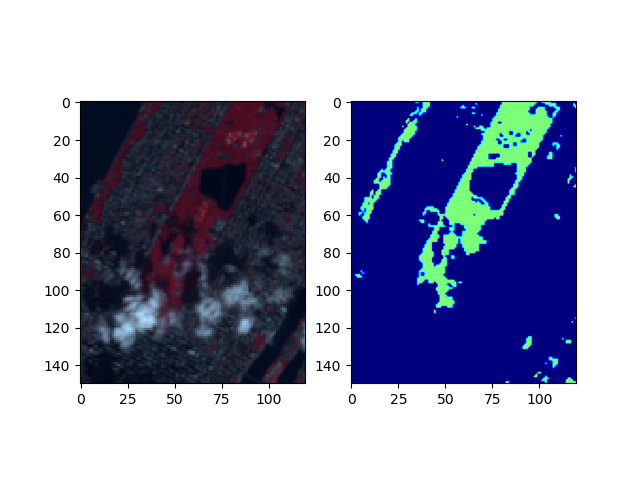

In [53]:
# Script for reading hyperspectral images and calculating the NDVI for each pixel
%matplotlib notebook

from PIL import Image
import numpy as np
from spectral import *
from matplotlib import cm
import matplotlib.pyplot as plt

band1 = Image.open('/Users/leidydorado/Downloads/EO1H0130322004250110KT_1T/EO1H0130322004250110KT_B045_L1T.TIF')
band2 = Image.open('/Users/leidydorado/Downloads/EO1H0130322004250110KT_1T/EO1H0130322004250110KT_B033_L1T.TIF')
band3 = Image.open('/Users/leidydorado/Downloads/EO1H0130322004250110KT_1T/EO1H0130322004250110KT_B020_L1T.TIF')
ImageArray = np.stack([np.array(band1), np.array(band2), np.array(band3)],axis = 2)
#print(ImageArray.shape)
cpdimage = ImageArray[1850:2000,480:600,:]
cpdimage = cpdimage - np.amin(np.amin(np.amin(cpdimage)))
cpdimage = cpdimage/np.amax(np.amax(np.amax(cpdimage)))

bandNIR = np.array(Image.open('/Users/leidydorado/Downloads/EO1H0130322004250110KT_1T/EO1H0130322004250110KT_B057_L1T.TIF'))
NIR_int = bandNIR[1850:2000,480:600]
bandRED = np.array(Image.open('/Users/leidydorado/Downloads/EO1H0130322004250110KT_1T/EO1H0130322004250110KT_B030_L1T.TIF'))
RED_int = bandRED[1850:2000,480:600]
NDVI = (np.array(NIR_int) - np.array(RED_int)) // (np.array(NIR_int) + np.array(RED_int))

plt.subplot(1, 2, 1)
plt.imshow(cpdimage, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(NDVI, vmin=-1, vmax=1, interpolation='bilinear', cmap = 'jet' )

plt.show()
